### Academic honesty statement



**This is an exam problem. You are required to be in class to work on this. By turning this in you certify that it is your own work and you have not received any unauthorized assistance.**

Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### Modeling a biological process



A biological process involves the growth of biomass ($B$) from substrate ($S$). Material balances have been derived for each species that represent the production of biomass and the consumption of substrate.

$\frac{dB}{dt} = \frac{k B S}{K + S}$

and

$\frac{dS}{dt} = -\frac{0.75 k B S}{K + S}$

where $B$ is the concentration of biomass, and $S$ is the concentration of substrate. It is known that $k=0.3$ and $K=10^{-6}$ in consistent units.

Plot the concentrations of biomass and substrate as a function of time if at $t=0$, $S=5.0$ and $B=0.05$. Use your solution to determine the maximum amount of biomass that can form. You can assume the equations are valid as long as the solution is physically relevant. Discuss your solution, and any potential issues with it.



### solution



The solution here is to set up the system of ODEs and plot the solution.



# Out [33]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

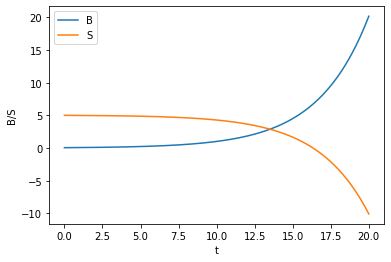

In [1]:
from scipy.integrate import solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt

k = 0.3
Km = 1e-6
B0 = 0.05
S0 = 5.0

def ode(t, X):
    B, S = X
    dBdt = k * B * S / (Km + S)

    dSdt = -0.75 * k * B * S / (Km + S)

    return [dBdt, dSdt]

tspan = (0, 20)
X0 = (B0, S0)
sol = solve_ivp(ode, tspan, X0, max_step=0.1)
plt.plot(sol.t, sol.y.T)
plt.xlabel('t')
plt.ylabel('B/S')
plt.legend(['B', 'S'])

You can see from this that between 15-17 time units, the substrate concentration becomes negative. This means the maximum amount of biomass that can be made is when S=0. The simplest way to find that point is with an event. The event is just where S=0. There is a sign change so this should be easy to find.



In [1]:
def event(t, X):
    B, S = X
    return S

event.terminal = True

sol = solve_ivp(ode, tspan, X0, max_step=0.1, events=event, dense_output=True)
sol.message, sol.t_events

# Out [34]:
# text/plain
('A termination event occurred.', [array([16.33442469])])

In [1]:
sol.sol(sol.t_events[0]).T

# Out [35]:
# text/plain
array([[ 6.71666667e+00, -1.05471187e-15]])

In [1]:
Bmax, Sfinal = sol.sol(sol.t_events[0])
Bmax[0]

# Out [36]:
# text/plain
6.716666666666666

In [1]:
print(f'S = {Sfinal[0]:0.1f} at t={sol.t_events[0][0]:1.2f} with a maximum B formed of {Bmax[0]:1.2f} units.')

# Out [37]:
# output
S = -0.0 at t=16.33 with a maximum B formed of 6.72 units.

The only discussion that is required here is that the mass balances lead to negative concentrations of S, which is completely unphysical. It suggest that either the mass balances are not correct, or that they are mathematically poorly behaved when S approaches 0. It is the case that the mass balances are not correct or relevant when S is negative. It also seems that they do not behave well as S goes to zero; the rates should also approach zero in this case but the integrator does not capture that.



#### A surprise with t_eval



You get close to, but usually not the correct answer if you used t\_eval and used the last value of the solution. That is often because the last value is not the same as where the event occurred. You would only discover this by careful checking of what you are doing.

Note also, that t\_eval and dense\_output are usually incompatible options.



# Out [32]:
# output
S = 0.6 at t=15.9 with a maximum B formed of 5.928 units.
The event occurred at 16.335091021736424

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

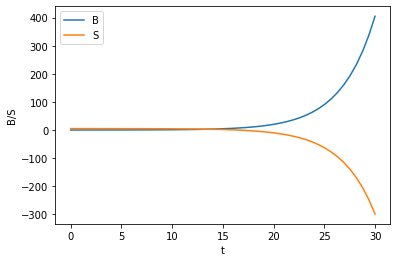

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt

k = 0.3
Km = 1e-6
B0 = 0.05
S0 = 5.0

def ode(t, X):
    B, S = X
    dBdt = k * B * S / (Km + S)

    dSdt = -0.75 * k * B * S / (Km + S)

    return [dBdt, dSdt]

tspan = (0, 30)
X0 = (B0, S0)
sol = solve_ivp(ode, tspan, X0, t_eval=np.linspace(*tspan))
plt.plot(sol.t, sol.y.T)
plt.xlabel('t')
plt.ylabel('B/S')
plt.legend(['B', 'S'])

def event(t, X):
    B, S = X
    return S

event.terminal = True

sol = solve_ivp(ode, tspan, X0, t_eval=np.linspace(*tspan), events=event)
sol.message, sol.t_events
Bmax = sol.y[0][-1]
Sfinal =  sol.y[1][-1]

print(f'S = {Sfinal:0.1f} at t={sol.t[-1]:1.1f} with a maximum B formed of {Bmax:1.3f} units.')
print(f'The event occurred at {sol.t_events[0][0]}')

The exact answer you get depends a lot on what limits you use, and how many points you choose. That is an indication that something funny is happening. By printing all the results above, you can see that S=0.6, which is not close to 0, which also indicates something funny is happening.



#### ODEINT version



A few  people used odeint, which turns out to have the most accurate solution. These ODEs are stiff because  around t=16.33 the rate should drop to zero. solve\_ivp fails to catch this, and so the rate goes negative. What you can see from this solution is S goes to near 0, and the biomass stops growing. So you can use the last value where it is steady to estimate the maximum amount. This also highlights that you cannot blindly take the answers from computational approaches, and that sometimes it is a good idea to double check a solution with another method.



# Out [29]:
# output
The maximum amount of biomass that can be formed is 6.716666666666667

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

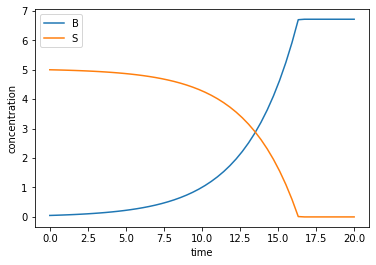

In [1]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

k = 0.3
K = 1e-6
B0 = 0.05
S0 = 5  # initial concentration of substrate


def dXdt(X, t):
    B, S = X
    dBdt = (k * B * S) / (K + S)
    dSdt = (-0.75 * k * B * S) / (K + S)
    return [dBdt, dSdt]


tspan = np.linspace(0, 20)
y0 = [0.05, 5]
sol = odeint(dXdt, y0, tspan)

plt.plot(tspan, sol)
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend(['B', 'S'])

print('The maximum amount of biomass that can be formed is', sol[-1, 0])